<a href="https://colab.research.google.com/github/ratesh21/DSP/blob/main/23SepDSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cross-Convolution using inbuilt function: 

[-10 -13   2  -1   8  19  11   6   6   0  -1]

Cross-Convolution using user-defined function: 

[  0. -10. -13.   2.  -1.   8.  19.  11.   6.   6.   0.]


<ipython-input-42-c7c15dddd014>:68: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_userconv, use_line_collection = True)


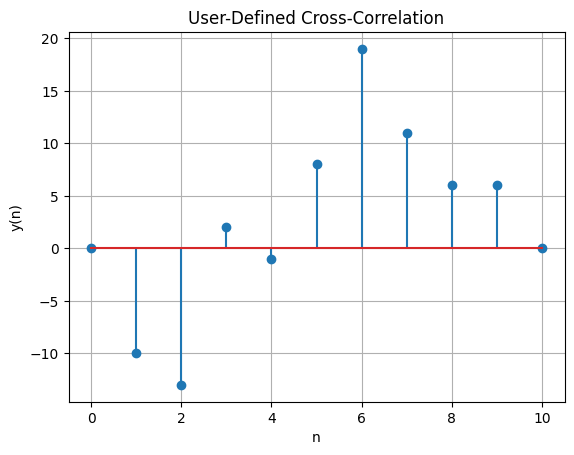

In [ ]:
#Q2) Perform Cross-Convolution by user-defined methods

import numpy as np
import matplotlib.pyplot as plt

n1 = np.arange(-12, -5, 1)
n2 = np.arange(-2, 3, 1)
# To calculate the delay for the cross-correlation, we need to consider the starting indices of n1 and n2.
# The delay is calculated as the difference between the starting indices of the two signals.
delay = n2[0]-n1[0]

n = np.arange(n1[0] + n2[0], n1[0] + n2[0] + len(n1) + len(n2) - 1)

x = np.array([-5, 1, 2, 1, 3, 2, -1])
h = np.array([2, 3, 1, 2, 1])

h_cc = np.array([1, 2, 1, 3, 2])

#Cross-covolution using in-built function
cross_convolution = np.correlate(x, h_cc, 'full')
print('Cross-Convolution using inbuilt function: ')
print()
print(cross_convolution)

def fold(h):
  return np.flip(h)

def padd(x, h):
  l1 = len(x)
  l2 = len(h)

  convolved_length = l1 + l2 -1
  x_pad = np.zeros(convolved_length)
  h_pad = np.zeros(convolved_length)

  x_pad[0:l1] = x
  h_pad[0:l2] = h

  return x_pad, h_pad


def multiply(x, h, m, k):
  y = 0
  len_h = len(h)
  y = x[k] * h[len_h - m + k]

  return y

def add(x, h, m):
  y = 0
  for i in range(m):
    y = y + multiply(x, h, m, i)

  return y

conv_length = len(x) + len(h) - 1

x, h = padd(x, h)
h = fold(h)
y_userconv = np.zeros(conv_length)
for i in range(conv_length):
  y_userconv[i] = add(x, h, i)
print()
print('Cross-Convolution using user-defined function: ')
print()
print(y_userconv)

plt.stem(y_userconv, use_line_collection = True)
plt.title('User-Defined Cross-Correlation')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid(True)
plt.show()